In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from zipfile import ZipFile

In [109]:
plt.style.use('seaborn-poster')
plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# extract data

# files=[]
# for file in os.listdir('Data'):
#     if file.endswith('.zip'):
#         files.append(file)
        
# for x in files:
#     with ZipFile(f'Data/{x}') as f:
#         f.extractall()        

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
store_df=pd.read_csv('Data/stores.csv')
feature_df=pd.read_csv('features.csv')
Submission=pd.read_csv('sampleSubmission.csv')

In [5]:
# analyse the data

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
train_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [12]:
feature_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [14]:
feature_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1, inplace=True)

In [15]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [16]:
train=train_df.merge(store_df, how='left').merge(feature_df, how='left')

In [17]:
test=test_df.merge(store_df, how='left').merge(feature_df, how='left')

# EDA

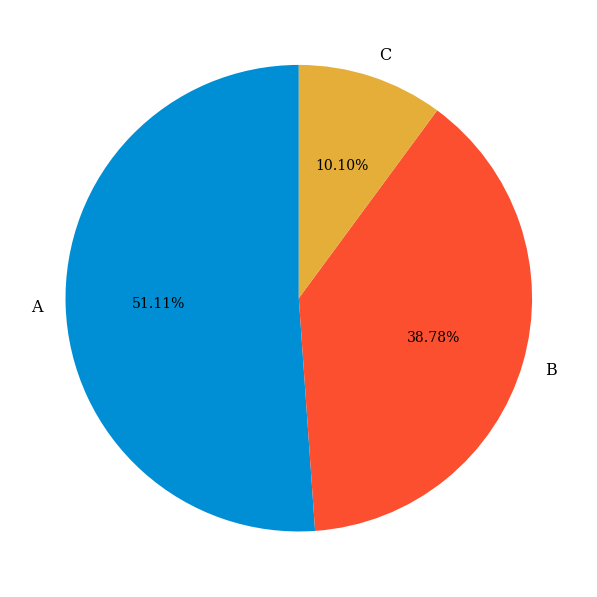

In [18]:
types=train['Type'].value_counts(dropna=False)
plt.figure(figsize=(10,10))
fig=plt.pie(types, labels=types.index,autopct='%1.2f%%',startangle=90)

# most stores are A type

In [19]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [20]:
# analyze categorical data distribution in train & test

cat_cols=['IsHoliday', 'Type']

print('============ TRAIN: \n')
print(train['IsHoliday'].value_counts()/len(train))
print('============ TEST: \n')
print(test['IsHoliday'].value_counts()/len(test))

============ TRAIN: 

False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64
============ TEST: 

False    0.922408
True     0.077592
Name: IsHoliday, dtype: float64


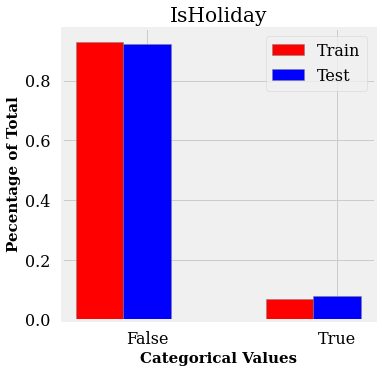

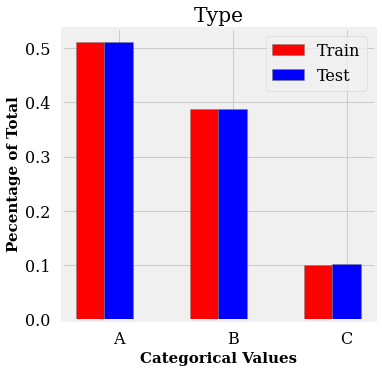

In [21]:
for i,col in enumerate(cat_cols):
    
    train_cat_col=train[col].value_counts().to_frame()/len(train)
    test_cat_col=test[col].value_counts().to_frame()/len(test)
    
    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(5, 5))

    # Set position of bar on X axis
    br1 = np.arange(len(train_cat_col))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    plt.bar(br1,train_cat_col[col].values, color ='r', width = 0.25,
            edgecolor ='grey', label ='Train')

    plt.bar(br2,test_cat_col[col].values, color ='b', width = 0.25,
            edgecolor ='grey', label ='Test')

    # Adding Xticks
    plt.title(col)
    plt.xlabel('Categorical Values', fontweight ='bold', fontsize = 15)
    plt.ylabel('Pecentage of Total', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(train_cat_col))],train_cat_col.index.tolist())
    

    plt.legend()
    plt.show()

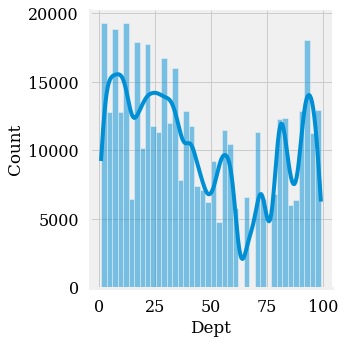

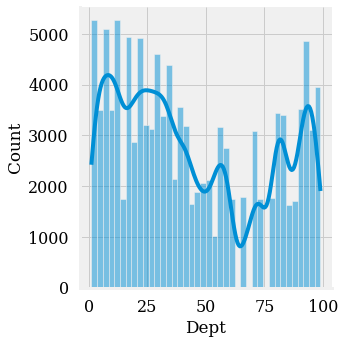

In [22]:
sns.displot(train['Dept'], kde=True, bins=40,)
sns.displot(test['Dept'],  kde=True, bins=40 )
plt.show()

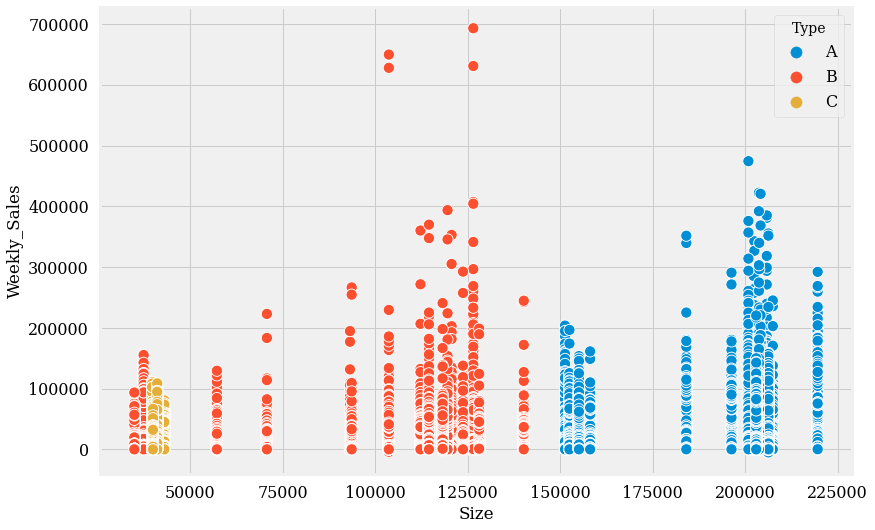

In [23]:
sns.scatterplot(data=train, x='Size', y='Weekly_Sales', hue='Type');

In [24]:
avg_sales  = train.groupby('Type')['Weekly_Sales'].mean().to_frame().reset_index()
avg_sales

,Type,Weekly_Sales
0,A,20099.568043
1,B,12237.075977
2,C,9519.532538


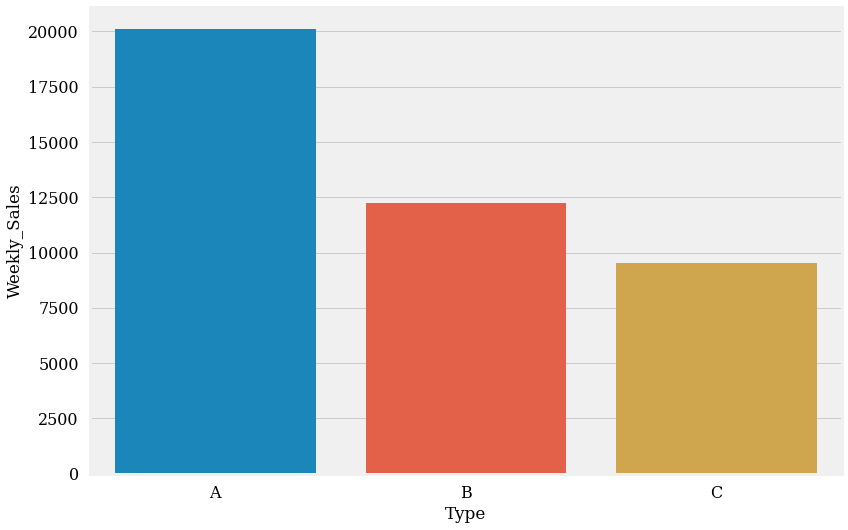

In [25]:
sns.barplot(data=avg_sales, x='Type', y='Weekly_Sales');

# Pipeline Setup 1

In [26]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [27]:
# make a validation df

break_date1 = pd.Timestamp("2011-06-05")
break_date2 = pd.Timestamp("2012-06-05")

train_df1 = train[train["Date"] <= break_date1]
test_df1 = train.loc[(train["Date"] > break_date1) & (train["Date"] <= break_date2)]
val_df = train[train["Date"] > break_date2]

In [28]:
def extract_week(df):
    temp=pd.DatetimeIndex(df['Date'])
    df['week']=temp.week
    df['month']=temp.month
    df['year']=temp.year
    
    return df

In [29]:
extract_week(train)
extract_week(train_df1)
extract_week(test_df1)
extract_week(val_df)

/var/folders/jv/57f83l2x4cx_n26b4xzvfz_m0000gn/T/ipykernel_6203/2019442456.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=temp.week
/var/folders/jv/57f83l2x4cx_n26b4xzvfz_m0000gn/T/ipykernel_6203/2019442456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week']=temp.week
/var/folders/jv/57f83l2x4cx_n26b4xzvfz_m0000gn/T/ipykernel_6203/2019442456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
122,1,1,2012-06-08,17666.00,False,A,151315,78.30,3.452,221.749484,7.143,23,6,2012
123,1,1,2012-06-15,17558.82,False,A,151315,79.35,3.393,221.762642,7.143,24,6,2012
124,1,1,2012-06-22,16633.41,False,A,151315,78.39,3.346,221.803021,7.143,25,6,2012
125,1,1,2012-06-29,15722.82,False,A,151315,84.88,3.286,221.843400,7.143,26,6,2012
126,1,1,2012-07-06,17823.37,False,A,151315,81.57,3.227,221.883779,6.908,27,7,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,42,10,2012


### Sale by Year

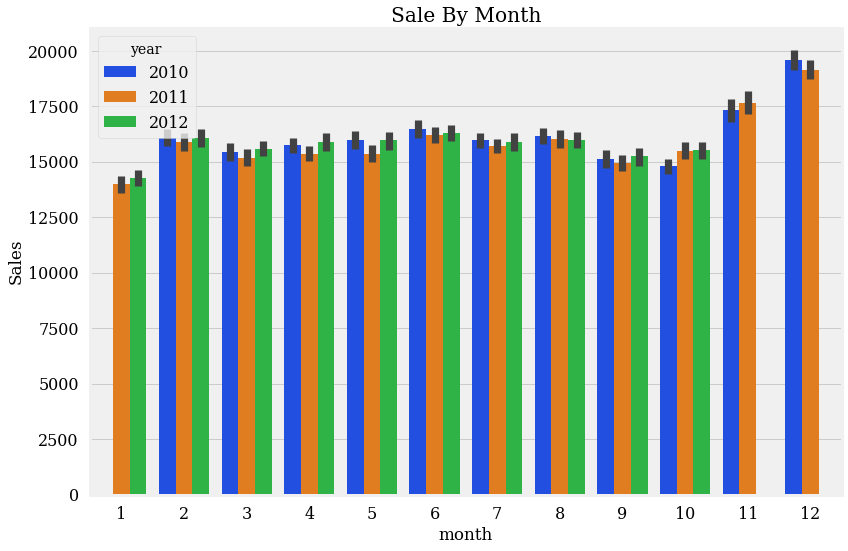

In [30]:
sns.barplot(data=train, 
            x='month', 
            y='Weekly_Sales', 
            hue='year', 
            palette='bright').set_title('Sale By Month')
plt.ylabel('Sales');

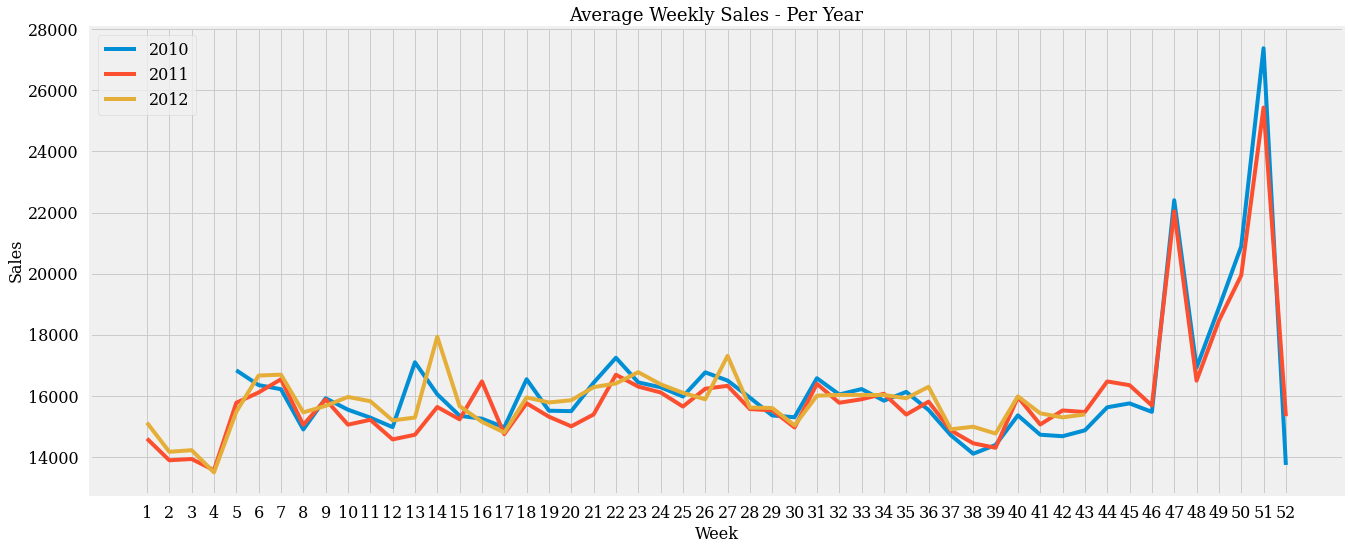

In [31]:
weekly_sales_2010=train[train.year==2010].groupby('week')['Weekly_Sales'].mean()
weekly_sales_2011=train[train.year==2011].groupby('week')['Weekly_Sales'].mean()
weekly_sales_2012=train[train.year==2012].groupby('week')['Weekly_Sales'].mean()

plt.figure(figsize=(20,8))

sns.lineplot(y=weekly_sales_2010.values,x=weekly_sales_2010.index)
sns.lineplot(y=weekly_sales_2011.values,x=weekly_sales_2011.index)
sns.lineplot(y=weekly_sales_2012.values,x=weekly_sales_2012.index)

plt.legend(['2010','2011','2012'], loc='best')
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)

plt.xticks(np.arange(1, 53, step=1));

### Sale by Week

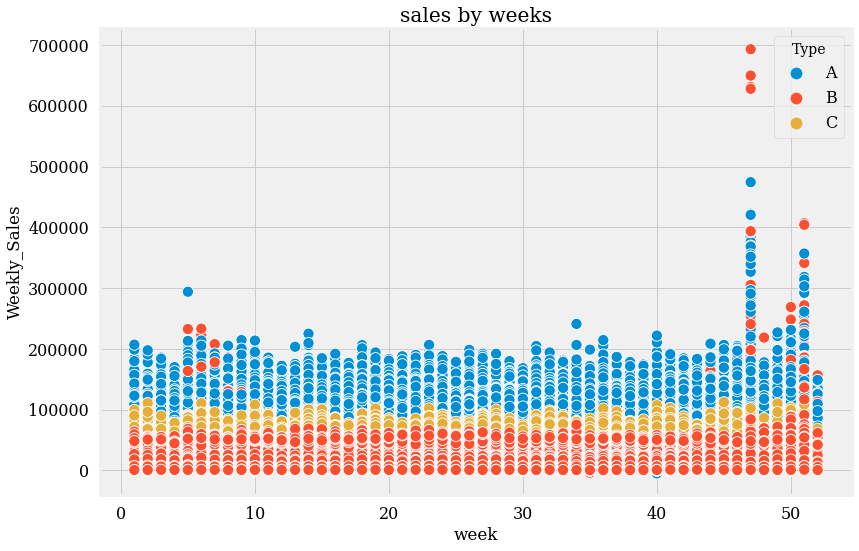

In [32]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='week',
                hue='Type').set_title('sales by weeks');

### Weekly Sales & Fuel Price Relation

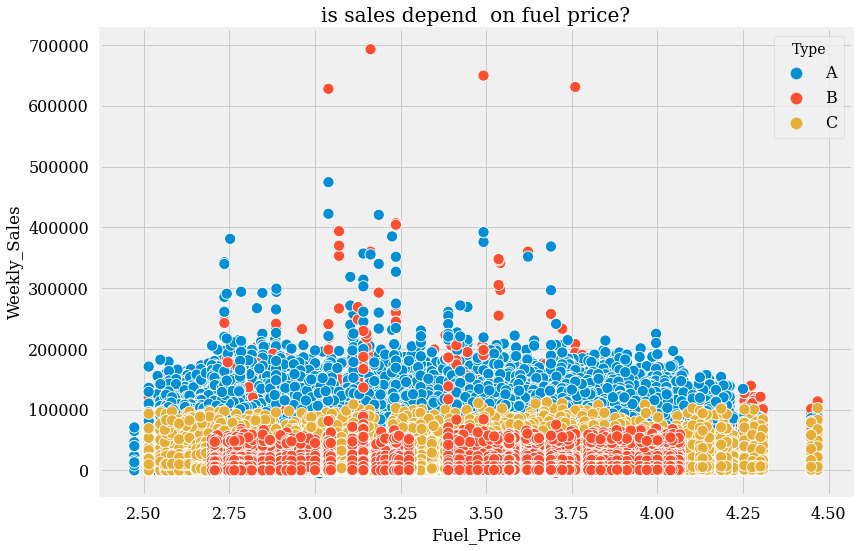

In [33]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='Fuel_Price',
                hue='Type').set_title('is sales depend  on fuel price?');

### Sales & Temperature Relation

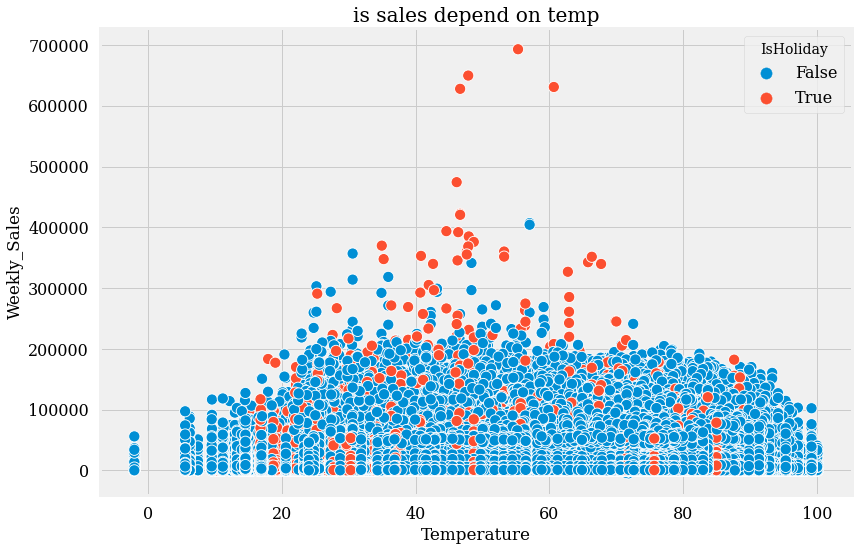

In [34]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='Temperature',
                hue='IsHoliday').set_title('is sales depend on temp');

### Sales & Unemployment Relation

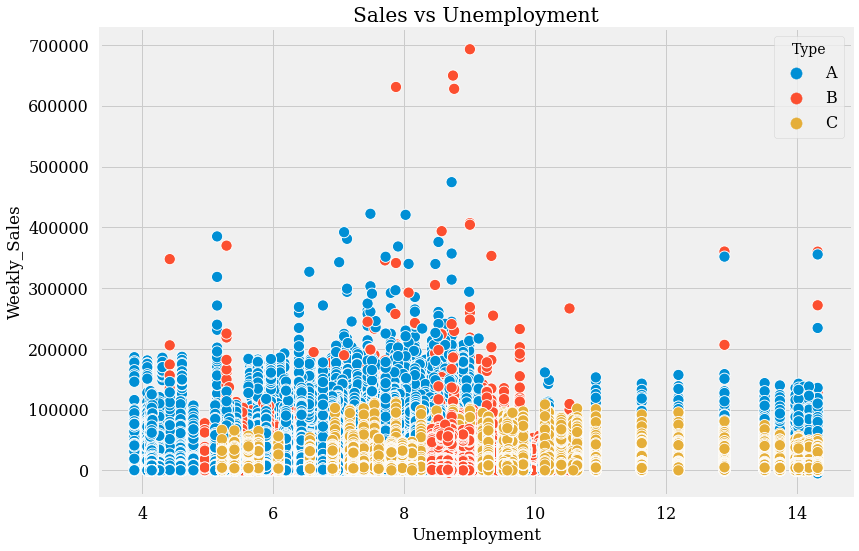

In [35]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='Unemployment',
                hue='Type').set_title('Sales vs Unemployment');

### Sales & Department Relation

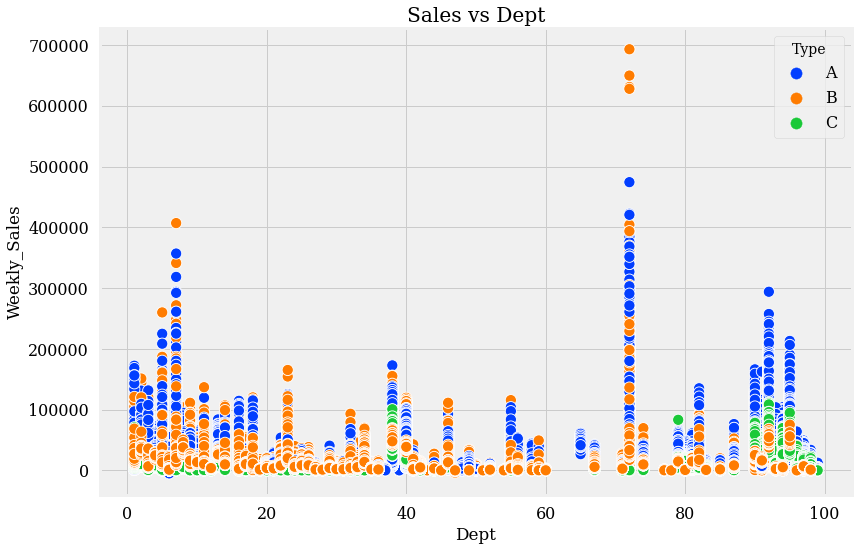

In [36]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='Dept',hue='Type',
                palette='bright').set_title('Sales vs Dept');

### Corelation Matrix

<AxesSubplot:>

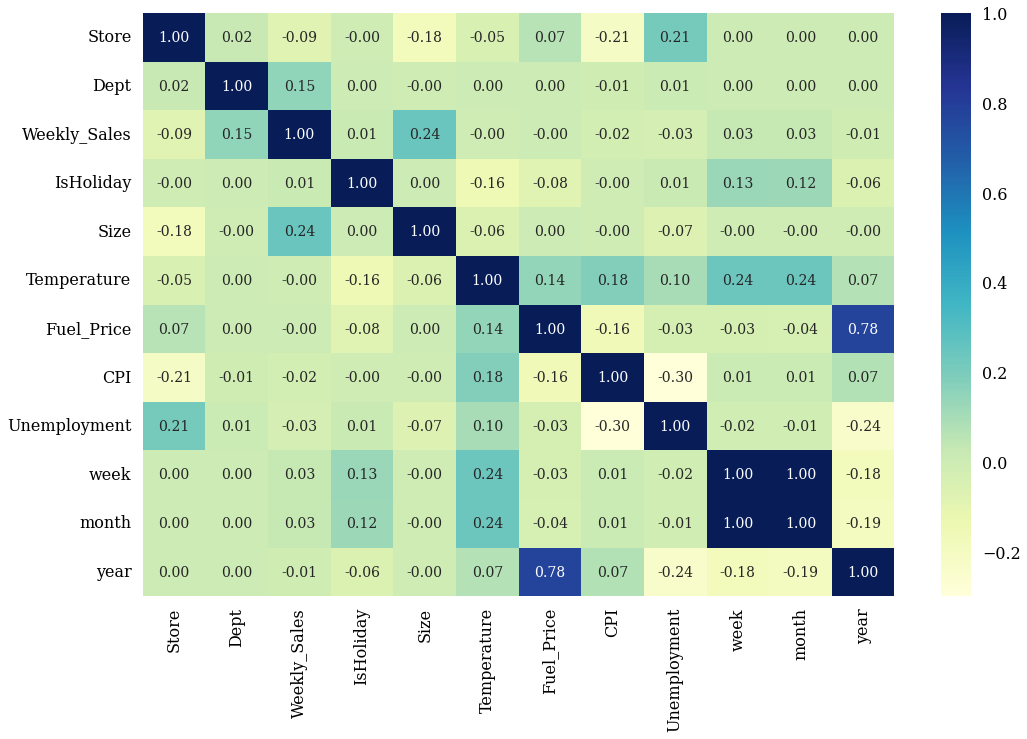

In [37]:
corr_matrix=train.corr()
plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f',
            cmap="YlGnBu")

# Pipeline Setup 2

In [38]:
def maping_type(df):
    df['Type']=df['Type'].map({'A':'1',
                              'B':'2',
                              'C':'3'})
    return df

In [39]:
maping_type(train)
maping_type(train_df1)
maping_type(val_df)
maping_type(test_df1)

/var/folders/jv/57f83l2x4cx_n26b4xzvfz_m0000gn/T/ipykernel_6203/331269964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type']=df['Type'].map({'A':'1',


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
70,1,1,2011-06-10,15883.52,False,1,151315,83.13,3.648,215.043523,7.682,23,6,2011
71,1,1,2011-06-17,14978.09,False,1,151315,86.41,3.637,214.998060,7.682,24,6,2011
72,1,1,2011-06-24,15682.81,False,1,151315,83.58,3.594,215.091098,7.682,25,6,2011
73,1,1,2011-07-01,15363.50,False,1,151315,85.55,3.524,215.184137,7.962,26,7,2011
74,1,1,2011-07-08,16148.87,False,1,151315,85.83,3.480,215.277175,7.962,27,7,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421544,45,98,2012-05-04,694.25,False,2,118221,55.21,3.951,190.922212,8.567,18,5,2012
421545,45,98,2012-05-11,893.60,False,2,118221,61.24,3.889,190.976417,8.567,19,5,2012
421546,45,98,2012-05-18,745.44,False,2,118221,66.30,3.848,190.996448,8.567,20,5,2012
421547,45,98,2012-05-25,795.94,False,2,118221,67.21,3.798,191.002810,8.567,21,5,2012


# Pipeline Step 3

In [40]:
def convert_to_int(df):
    df['Type']=df['Type'].astype(int)
    df['IsHoliday']=df['IsHoliday'].astype(int)
    return df

In [41]:
convert_to_int(train)
convert_to_int(train_df1)
convert_to_int(test_df1)
convert_to_int(val_df)

/var/folders/jv/57f83l2x4cx_n26b4xzvfz_m0000gn/T/ipykernel_6203/3039084791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type']=df['Type'].astype(int)
/var/folders/jv/57f83l2x4cx_n26b4xzvfz_m0000gn/T/ipykernel_6203/3039084791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsHoliday']=df['IsHoliday'].astype(int)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
122,1,1,2012-06-08,17666.00,0,1,151315,78.30,3.452,221.749484,7.143,23,6,2012
123,1,1,2012-06-15,17558.82,0,1,151315,79.35,3.393,221.762642,7.143,24,6,2012
124,1,1,2012-06-22,16633.41,0,1,151315,78.39,3.346,221.803021,7.143,25,6,2012
125,1,1,2012-06-29,15722.82,0,1,151315,84.88,3.286,221.843400,7.143,26,6,2012
126,1,1,2012-07-06,17823.37,0,1,151315,81.57,3.227,221.883779,6.908,27,7,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,42,10,2012


# Training Model

In [42]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,9,3,2010


In [43]:
X=train.drop(['Weekly_Sales','Date'], axis=1)
y=train['Weekly_Sales']

In [47]:
X.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,0,1,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,1,1,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,0,1,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,0,1,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,0,1,151315,46.50,2.625,211.350143,8.106,9,3,2010


In [48]:
input_col = ['Store', 'IsHoliday', 'Type', 'Size', 'week','Dept','year']
target = ['Weekly_Sales']

In [61]:
X_train=train[input_col]
y_train=train[target]

In [66]:
X_train

,Store,IsHoliday,Type,Size,week,Dept,year
0,1,0,1,151315,5,1,2010
1,1,1,1,151315,6,1,2010
2,1,0,1,151315,7,1,2010
3,1,0,1,151315,8,1,2010
4,1,0,1,151315,9,1,2010
...,...,...,...,...,...,...,...
421565,45,0,2,118221,39,98,2012
421566,45,0,2,118221,40,98,2012
421567,45,0,2,118221,41,98,2012
421568,45,0,2,118221,42,98,2012


In [56]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [57]:
# randomised search CV

#number of tress in random forest
n_estimators=[int(x) for x in np.linspace(0,1200,12)]

#number of features in every split
max_features=['auto','sqrt']

#max numberof levels in tree
max_depth=[int(x) for x in np.linspace(5,30,6)]

#min number of samples required to split the node
min_samples_split = [2, 5, 10, 15, 100]

#min number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
# create the random grid
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [0, 109, 218, 327, 436, 545, 654, 763, 872, 981, 1090, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [60]:
rf_random=RandomizedSearchCV(estimator = model, 
                             param_distributions = random_grid,
                             scoring='neg_mean_squared_error', 
                             n_iter = 10, 
                             cv = 5,
                             verbose=2,
                             random_state=42,
                             n_jobs=1)

In [67]:
rf_random.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time= 1.2min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1090; total time= 2.0min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1090; total time= 2.0min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [0, 109, 218, 327, 436,
                                                         545, 654, 763, 872,
                                                         981, 1090, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Test the Model

In [70]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [73]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154016 entries, 70 to 421548
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         154016 non-null  int64         
 1   Dept          154016 non-null  int64         
 2   Date          154016 non-null  datetime64[ns]
 3   Weekly_Sales  154016 non-null  float64       
 4   IsHoliday     154016 non-null  int64         
 5   Type          154016 non-null  int64         
 6   Size          154016 non-null  int64         
 7   Temperature   154016 non-null  float64       
 8   Fuel_Price    154016 non-null  float64       
 9   CPI           154016 non-null  float64       
 10  Unemployment  154016 non-null  float64       
 11  week          154016 non-null  int64         
 12  month         154016 non-null  int64         
 13  year          154016 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 17.6 MB


In [72]:
input_col = ['Store', 'IsHoliday', 'Type', 'Size', 'week','Dept','year']
target = ['Weekly_Sales']

In [81]:
X_test=test_df1[input_col]
y_test=test_df1[target]

In [82]:
X_test.head()

,Store,IsHoliday,Type,Size,week,Dept,year
70,1,0,1,151315,23,1,2011
71,1,0,1,151315,24,1,2011
72,1,0,1,151315,25,1,2011
73,1,0,1,151315,26,1,2011
74,1,0,1,151315,27,1,2011


In [83]:
predictions=rf_random.predict(X_test)

In [95]:
predictions

array([16428.62174123, 15918.32704354, 16055.30148621, ...,
         963.1361222 ,   932.32566734,  1213.63188296])

In [105]:
y_test['Weekly_Sales']

70        15883.52
71        14978.09
72        15682.81
73        15363.50
74        16148.87
            ...   
421544      694.25
421545      893.60
421546      745.44
421547      795.94
421548      874.64
Name: Weekly_Sales, Length: 154016, dtype: float64

In [ ]:
sns.displot(y_test['Weekly_Sales']-predictions)

In [ ]:
plt.figure(figsize=(20,20))
plt.hist(y_test['Weekly_Sales']-predictions)